# Predict electricity demand to optimize power plant output

The **Combined Cycle Power Plant (CCPP) dataset** aims to solve a regression problem, where the goal is to predict the net energy output (PE) of a power plant given certain environmental conditions. This problem is crucial for optimizing power plant operations, improving efficiency, and meeting energy demand while minimizing costs and environmental impact.

> ## 1. Problem Statement
The goal of this project is to predict the net power output (PE) of a Combined Cycle Power Plant (CCPP) based on four environmental variables:

**Ambient Temperature (AT)
Exhaust Vacuum (V)
Ambient Pressure (AP)
Relative Humidity (RH)**

*Business Context:*
Combined Cycle Power Plants are widely used for energy production. Accurate prediction of power output is essential for:

 - Optimizing operations to meet fluctuating energy demands.
 - Reducing costs by avoiding overproduction or underutilization.
 - Improving energy efficiency by identifying how environmental factors impact performance.

**The challenge is to develop a robust and accurate predictive model that uses these inputs to estimate the plant's power output under varying environmental conditions.**

##  Why is This Problem Important?
 - **Operational Efficiency:** Accurate predictions of energy output allow operators to optimize resource usage and maintain consistent energy supply.

 - **Benefits of Cost and Environmental**: By understanding how environmental factors affect energy output, plant managers can implement strategies to reduce energy wastage and emissions.

 - **Scalability**: The Insights, (i'm about provide you) gained from this model could be applied to similar power plants in other locations or under varying environmental conditions.
 
## Objective 
Develop a machine learning model that predicts the ***NET ENERGY (PE)*** output of a combined cycle power plant using environmental variables such as temperature, exhaust vacuum, ambient pressure, and relative humidity.

> ## 2. Data Collection

### 2.1 Data Sources
Downloaded the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant).

### 2.2 Data Description
 - Data Dictionary


| Variable | Role	| Type	    | Description	                     |  Units |
|----------|--------|-----------|------------------------------------|--------|
|AT	       | Feature| Continuous| in the range 1.81°C and 37.11°C	 |   C	  | 
|V	       | Feature| Continuous| in teh range 25.36-81.56 cm Hg	 | cm Hg  |	
|AP	       | Feature| Continuous| in the range 992.89-1033.30 milibar|milibar |	
|RH	       | Feature| Continuous| in the range 25.56 to 100.16%	     |%	      |
|PE	       | Target	| Continuous| 420.26-495.76 MW	                 |MW	  |   

### Variables Information
- Temperature (T) 
- Ambient Pressure (AP),
- Relative Humidity (RH) 
- Exhaust Vacuum (V) 
- Net hourly electrical energy output (EP)

*The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.* 

## Importing and Loading the dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt

In [2]:
#load dataset
dataset = pd.read_excel('Folds5x2_pp.xlsx')

> ## 3. Data Exploration and Understanding
In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

In [3]:
print(f"Shape of the dataset: {dataset.shape}")

Shape of the dataset: (9568, 5)


In [4]:
#first 15 values
dataset.head(15)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [5]:
#last 10 values
dataset.tail(10)

,AT,V,AP,RH,PE
9558,22.97,62.40,1010.25,75.18,445.30
9559,26.22,49.82,1015.48,55.80,454.20
9560,23.27,68.28,1005.01,74.83,444.86
9561,11.76,41.58,1020.91,88.35,465.45
9562,14.02,40.10,1015.56,82.44,467.32
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [6]:
#understading the siz of the dataset
dataset.shape

(9568, 5)

In [7]:
#details about columns, their data types, and non-null values.
print("-----------Dataset Information---------")
dataset.info()

-----------Dataset Information---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
#basic stats for numerical columns
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [9]:
print("Missing values?")
dataset.isnull().sum()

Missing values?


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Insight: "well, fortunately we don't have any missing values!"

In [10]:
# Checking the data types of the columns
dataset.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [11]:
# It efficiently tallies the occurrences of each unique value, providing valuable insights into the data's composition.
dataset.value_counts()

AT     V      AP       RH     PE    
7.87   41.17  1020.33  77.77  486.20    2
27.64  75.60  1017.35  54.78  441.04    2
8.57   41.17  1020.18  72.47  484.20    2
9.54   41.17  1019.79  65.61  481.18    2
25.79  75.60  1017.46  75.63  434.65    2
                                       ..
15.42  40.56  1021.23  59.37  469.33    1
15.43  38.58  1016.58  81.17  463.44    1
       39.16  1016.44  79.80  470.74    1
       39.64  1008.58  87.99  464.05    1
37.11  68.94  1006.23  31.15  429.25    1
Name: count, Length: 9527, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


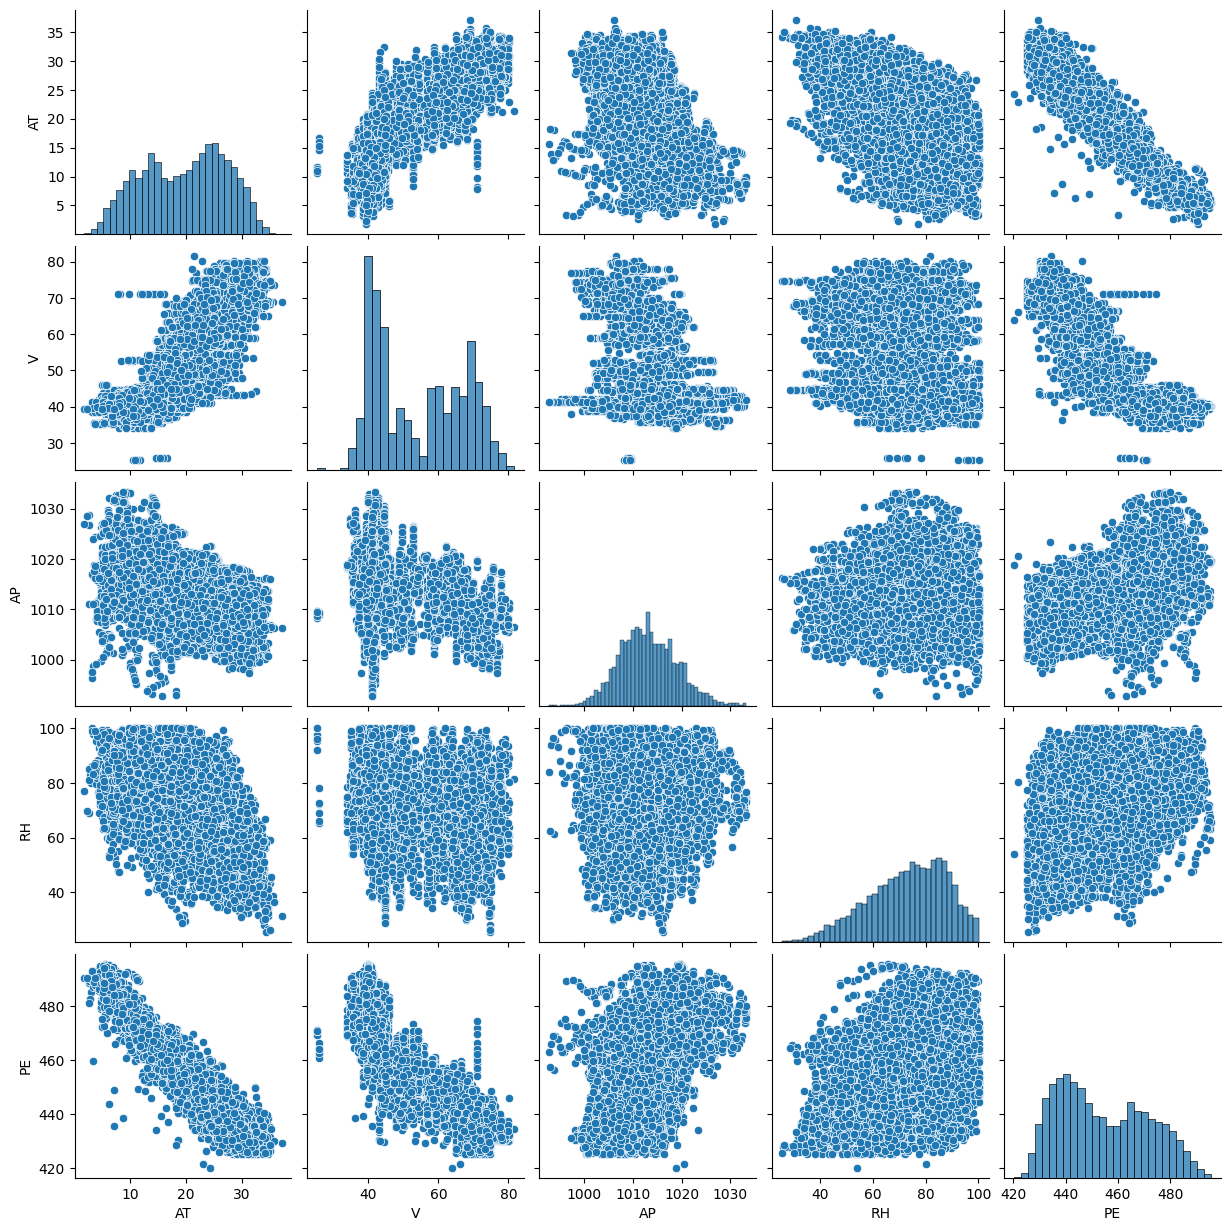

In [12]:
# Pairplots are used to visualize relationships between numerical variables.
# Each plot compares two variables, and the diagonal displays histograms.

sb.pairplot(dataset, vars=['AT', 'V', 'AP', 'RH', 'PE'])

folder_path = "E:\plots" 
file_name = "PAIR_plot.png"
pt.savefig(f"{folder_path}/{file_name}", dpi=300, bbox_inches='tight') 

pt.show()

### INITIAL INSIGHTS
Here is my insights for **Pairplots** for all *columns*:

**Relationships Between Variables:**
There seems to be negative correlation between AT (Ambient Temperature) and PE (Power Output), which makes sense as higher temperatures might reduce efficiency in energy production.
V (Exhaust Vacuum) shows a relatively strong positive correlation with PE.
AP (Ambient Pressure) and RH (Relative Humidity) appear to have weaker relationships with PE.

**Distribution of Features:**
*AT and PE*: Both features show a unimodal distribution but with varying spreads. There might be some data points towards the extremes (potential outliers) in PE.
*AP*: The values are tightly concentrated around the 1010–1020 range, suggesting limited variability. This could potentially reduce its predictive power.
RH: The distribution looks multimodal, with spikes around specific values. This might indicate some seasonal or categorical impact.
*V*: Shows a skewed distribution, which might need transformation (e.g., log-scaling) if it affects the ANN's performance.

## ✹ Environmental Insights

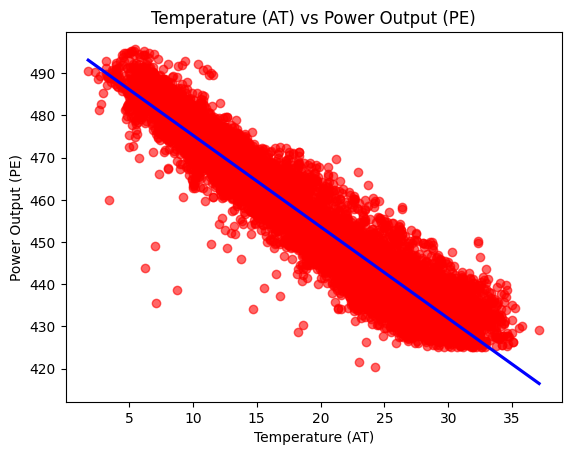

In [11]:
sb.regplot(data=dataset, x='AT', y='PE', color = 'red', scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
pt.title('Temperature (AT) vs Power Output (PE)')
pt.xlabel('Temperature (AT)')
pt.ylabel('Power Output (PE)')

folder_path1 = "E:\plots" 
file_name1 = "ATvPE_plot.png"
pt.savefig(f"{folder_path1}/{file_name1}", dpi=300, bbox_inches='tight') 

pt.show()

**Temperature (AT) vs. Power Output (PE)**

**Insight**: Higher temperatures (AT) negatively affect the power output (PE). This is due to reduced efficiency in thermal energy conversion as the ambient temperature increases.

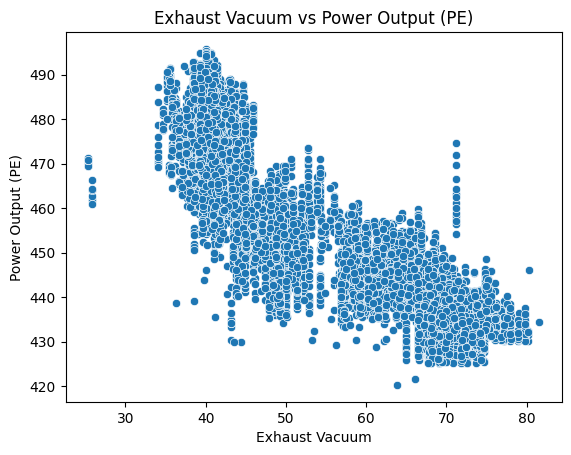

In [13]:
sb.scatterplot(data=dataset, x='V', y='PE')
pt.title('Exhaust Vacuum vs Power Output (PE)')
pt.xlabel('Exhaust Vacuum')
pt.ylabel('Power Output (PE)')

folder_path2 = "E:\plots" 
file_name2 = "VvPE.png"
pt.savefig(f"{folder_path2}/{file_name2}", dpi=300, bbox_inches='tight') 
pt.show()

**Exhaust Vacuum (V) vs. Power Output (PE)**

**Insight**: Vacuum (V) has a strong positive correlation with PE. As vacuum increases, the turbines operate more efficiently, leading to higher power output.

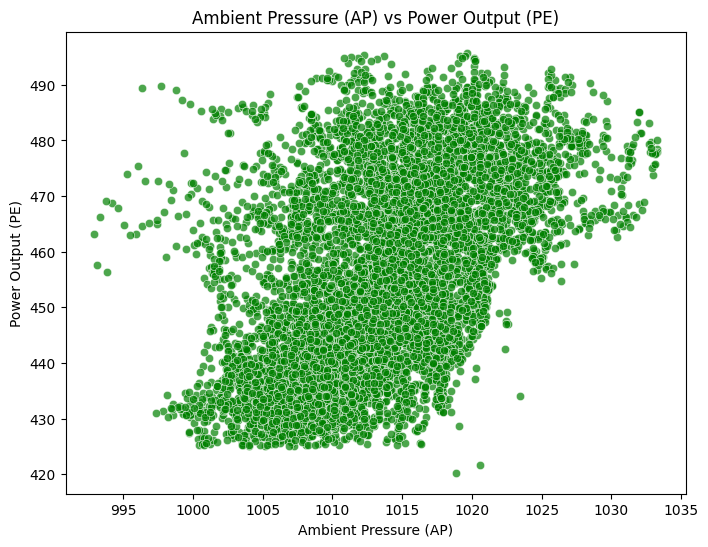

In [14]:
pt.figure(figsize=(8, 6))
sb.scatterplot(x=dataset['AP'], y=dataset['PE'], color='green', alpha=0.7)
pt.title('Ambient Pressure (AP) vs Power Output (PE)')
pt.xlabel('Ambient Pressure (AP)')
pt.ylabel('Power Output (PE)')

folder_path3 = "E:\plots" 
file_name3 = "APvPE_plot.png"
pt.savefig(f"{folder_path3}/{file_name3}", dpi=300, bbox_inches='tight') 
pt.show()

**Ambient Pressure (AP) vs. Power Output (PE)**

**Insight**: Ambient pressure (AP) shows a moderate positive correlation with PE. Higher pressures improve combustion efficiency in power plants, resulting in better energy conversion.

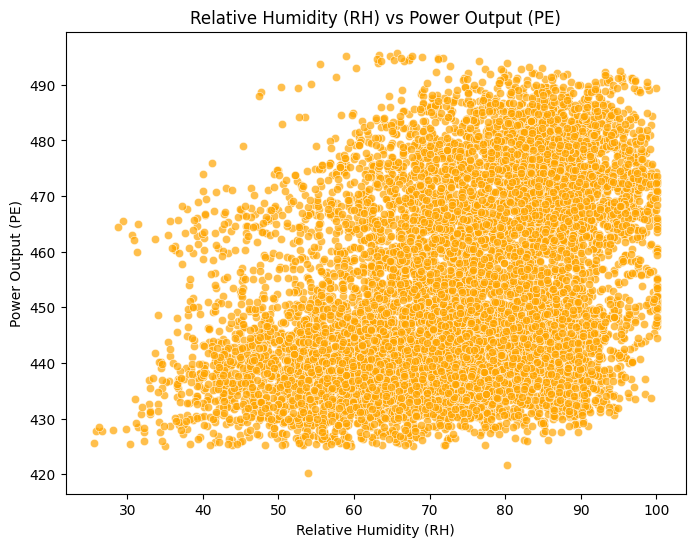

In [15]:
pt.figure(figsize=(8, 6))
sb.scatterplot(x=dataset['RH'], y=dataset['PE'], color='orange', alpha=0.7)
pt.title('Relative Humidity (RH) vs Power Output (PE)')
pt.xlabel('Relative Humidity (RH)')
pt.ylabel('Power Output (PE)')

folder_path4 = "E:\plots" 
file_name4 = "RHvPE_plot.png"
pt.savefig(f"{folder_path4}/{file_name4}", dpi=300, bbox_inches='tight') 
pt.show()

**Relative Humidity (RH) vs. Power Output (PE)**

**Insight**: Relative Humidity (RH) has a complex relationship with PE. While higher humidity can cool the environment, leading to slightly improved efficiency, very high levels of RH might reduce the air density, affecting turbine performance.

> ## Final Environmental Insights
 - Reducing operational temperature during peak load times could improve efficiency.
 - Monitoring vacuum pressure is critical for ensuring optimal power output.

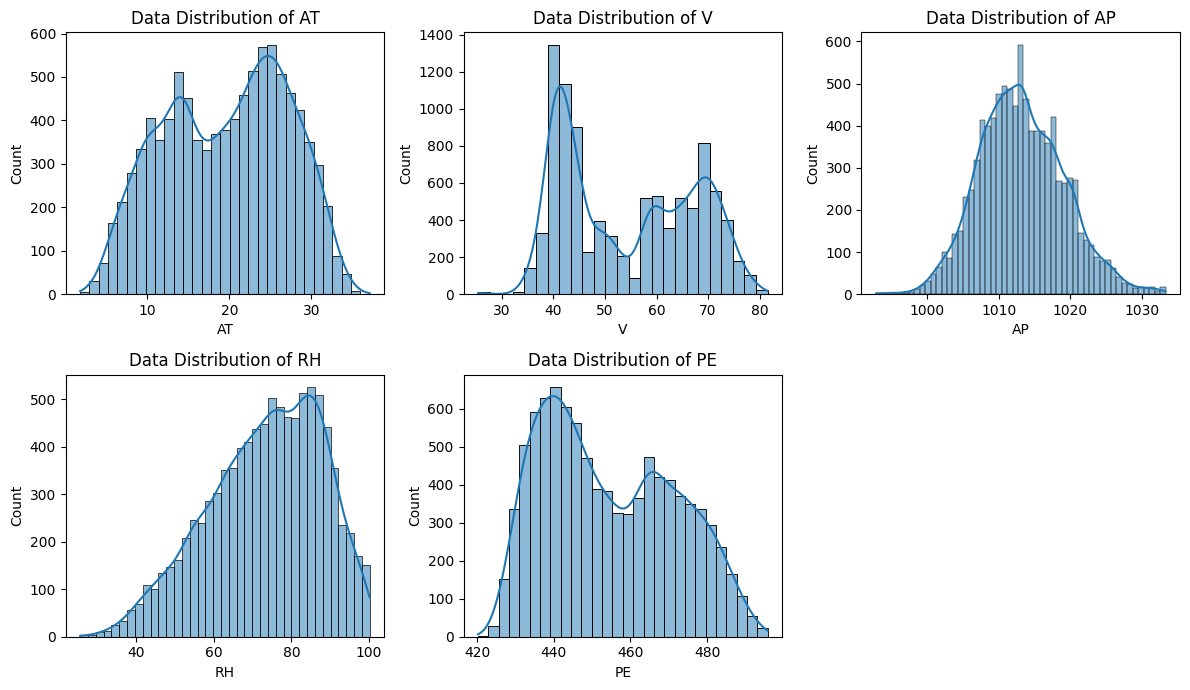

In [19]:
# Data distribution plot
#data's skewness and central tendencies.
pt.figure(figsize=(12, 7))
n_col = dataset.columns
for i, col in enumerate(n_col):
    pt.subplot(2, 3, i+1)
    sb.histplot(data = dataset[col], kde = True)
    pt.title(f"Data Distribution of {col}")
pt.tight_layout()

folder_path6 = "E:\plots" 
file_name6 = "DATADIS_plot.png"
pt.savefig(f"{folder_path6}/{file_name6}", dpi=300, bbox_inches='tight') 
pt.show()

## INITIAL INSIGHTS

 - AT and V: AT has a slightly bimodal distribution, which might indicate that the data was collected under different operational conditions. This is fine but worth noting.
V has multiple peaks, indicating variability in the exhaust vacuum data.

 - AP:Appears to have a near-normal distribution, which is good for modeling.

 - RH: Positively skewed, with more data concentrated at higher relative humidity levels.

 - PE (Target Variable): PE also seems to have a slightly bimodal distribution, which aligns with the nature of the data collection (likely under different operational scenarios).

In [17]:
#Correlation measures the strength of the relationship between two variables
#(range: -1 to +1)
cormatrix = dataset[['AT', 'V', 'AP', 'RH', 'PE']].corr()
cormatrix

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


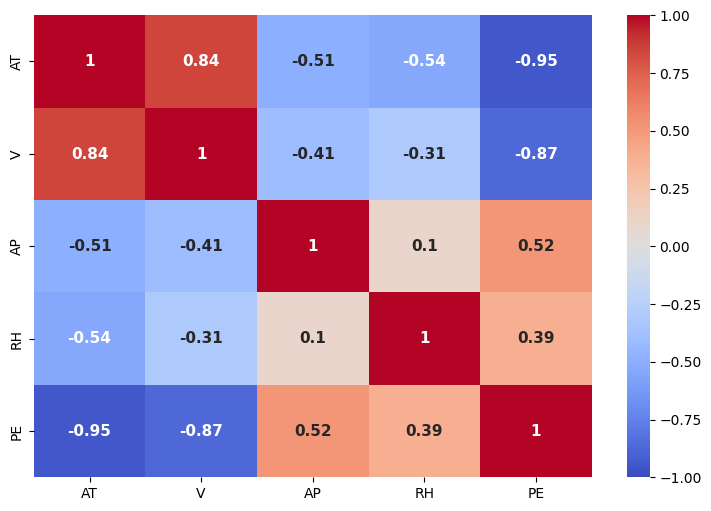

In [18]:
#how each feature correlates with the target variable (PE) and with each other.
fig, ax = pt.subplots(figsize =(9, 6))
sb.heatmap(cormatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
           annot_kws = {'fontsize':11, 'fontweight':'bold'})
folder_path5 = "E:\plots" 
file_name5 = "CORR_plot.png"
pt.savefig(f"{folder_path5}/{file_name5}", dpi=300, bbox_inches='tight') 
pt.show()

## INITIAL INSIGHTS
Here is my insights for Coorelation heatmap for all columns:

**Target Variable (PE)**:
Strong negative correlation with AT (-0.95) and V (-0.87).
Positive correlation with AP (0.52) and RH (0.39).
AT and V seem to be the most important predictors for PE.

**Multicollinearity Among Features**:
AT and V have a high positive correlation (0.84), which indicates multicollinearity. Using both features as-is might lead to redundancy in the model.
AP and RH have almost no correlation with AT or V but are moderately correlated with each other (0.1).

*Other Features*:
AP and RH show moderate or weak correlations with PE. However, these features might still add value if combined with others.

Multicollinearity Among Features: AT and V have a high positive correlation


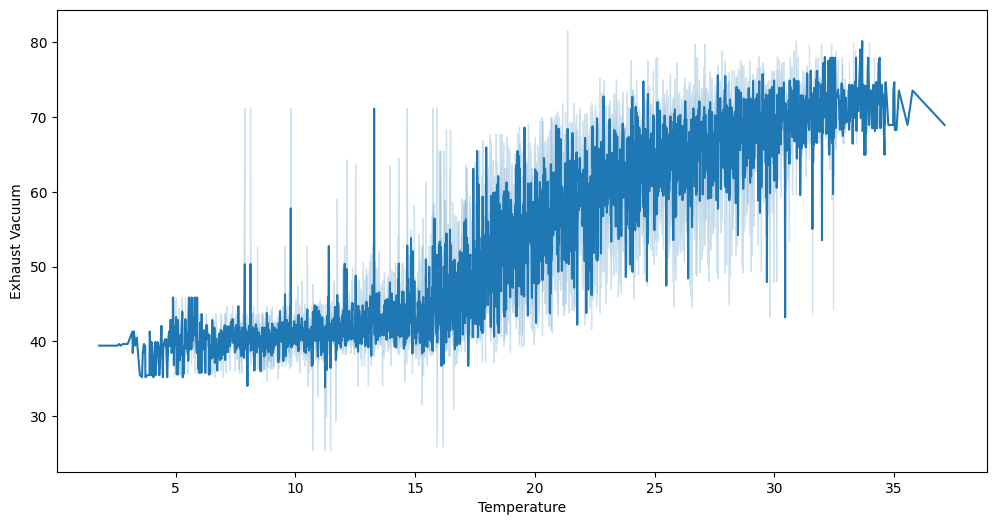

In [26]:
fig, ax = pt.subplots(figsize =(12, 6))
sb.lineplot(data=dataset, x="AT", y="V")
print("Multicollinearity Among Features: AT and V have a high positive correlation")
ax.set_xlabel("Temperature")
ax.set_ylabel("Exhaust Vacuum")
pt.show()

> ## 4. Data Preprocessing
### 3.1 Feature Enginneering (Optional)
Given the high correlation(From heatmap) between AT and V, along with their strong correlation with PE, creating a derived feature such as AT × V could be beneficial. This would capture their combined interaction effect on the target variable (PE) and may improve model performance.

**Why Consider AT × V?**
Since both features strongly influence PE and are highly correlated, their interaction may explain additional variance in PE that the model cannot capture using the individual features alone.
Feature engineering can sometimes help mitigate multicollinearity by transforming the features into forms where the redundancy is reduced.

In [161]:
# # adding feature AT_V
# dataset['AT_V'] = dataset['AT'] * dataset['V']
# dataset.head()
# dataset.drop('AT_V', axis=1)

### 3.2 Detecting outliers/anomaly

Presence of any outliers in each numerical columns


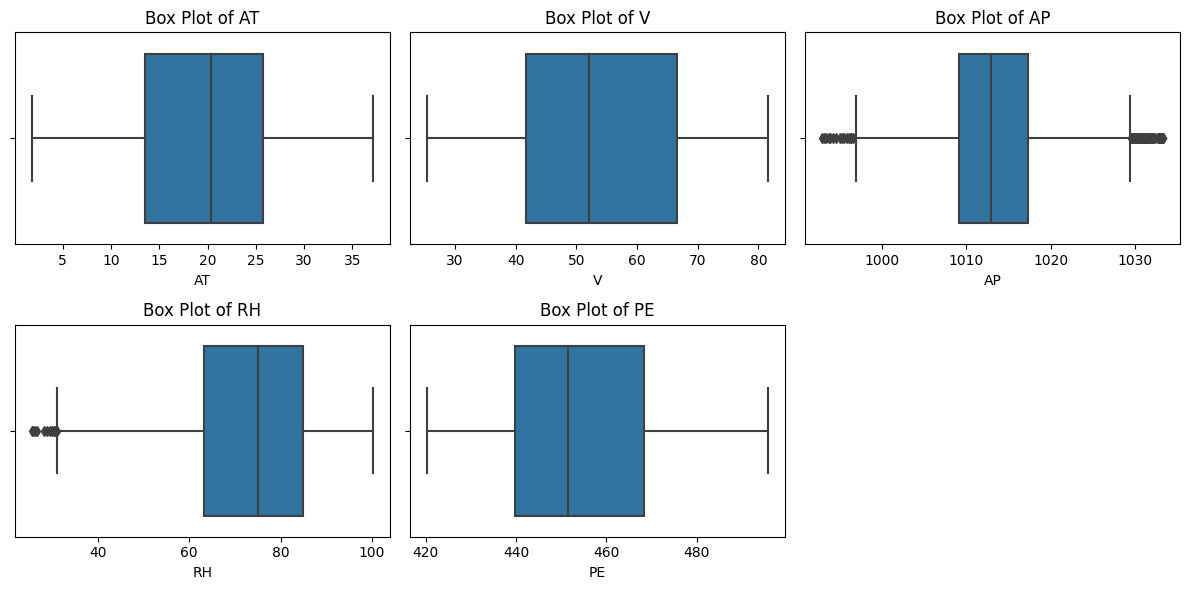

In [20]:
#Outlier analysis
print("Presence of any outliers in each numerical columns")
pt.figure(figsize=(12, 6))
for i, col in enumerate(dataset.columns):
    pt.subplot(2, 3, i + 1)
    sb.boxplot(x=dataset[col])
    pt.title(f'Box Plot of {col}')
pt.tight_layout()

folder_path7 = "E:\plots" 
file_name7 = "BLOXPLOT_plot.png"
pt.savefig(f"{folder_path7}/{file_name7}", dpi=300, bbox_inches='tight') 
pt.show()

As we can see, the outliers are mostly present in the columns like AP and RH, to improve feature scaling we need to remove the outliers

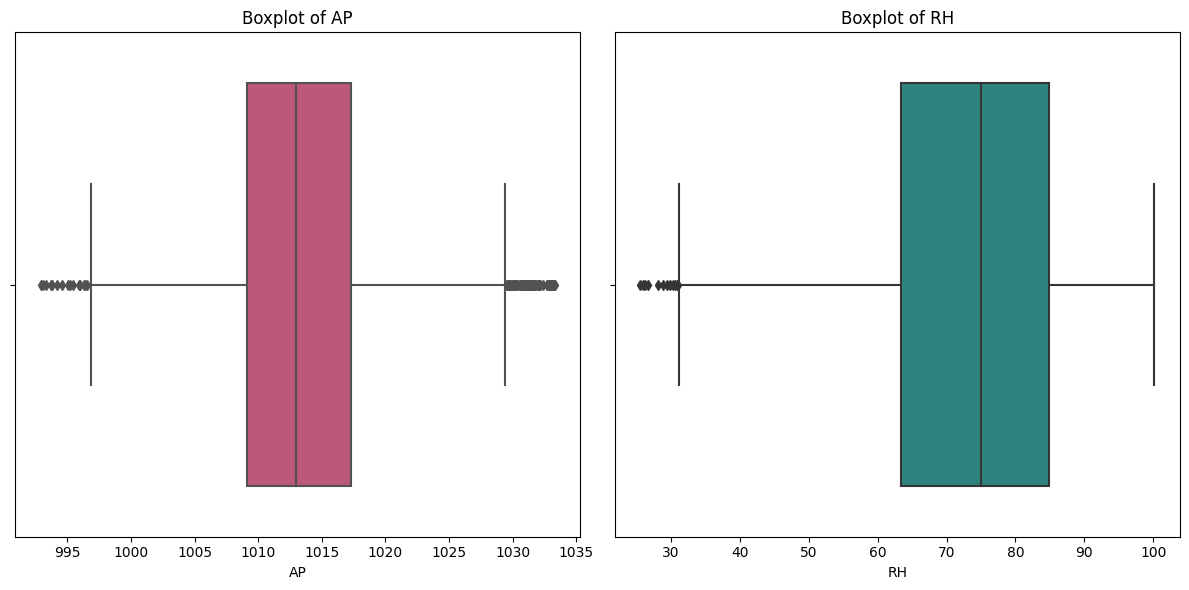

In [28]:
fig, axes = pt.subplots(1, 2, figsize=(12, 6))
sb.boxplot(data=dataset, x=dataset['AP'], ax=axes[0], palette="plasma") # Boxplot for AP
axes[0].set_title("Boxplot of AP")

sb.boxplot(data=dataset, x=dataset['RH'], ax=axes[1], palette="viridis") # Boxplot for RH
axes[1].set_title("Boxplot of RH")
pt.tight_layout()
pt.show()

#### Removing Outliers by Using IQR from AP and RH columns

The Interquartile Range (IQR) is a measure of statistical dispersion, or in simpler terms, it shows the spread of the middle 50% of the data. The formula to calculate IQR is:

**IQR = Q3-Q1**

Where:
- Q1 is the first quartile (25th percentile), which is the value below which 25% of the data fall.
- Q3 is the third quartile (75th percentile), which is the value below which 75% of the data fall.

Steps to calculate IQR:
 - Order the data in ascending order.
 - Find Q1 (the median of the lower half of the data).
 - Find Q3 (the median of the upper half of the data).
 - Subtract Q1 from Q3 to get the IQR.

The IQR helps in identifying outliers. Typically, any data point that is below 
Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR is considered an outlier.

In [6]:
# Identifying Outliers in AP and RH columns
# Calculating  IQR for AP and RH
Q1ap = dataset['AP'].quantile(0.25)
Q3ap = dataset['AP'].quantile(0.75)
IQRap = Q3ap - Q1ap

Q1rh = dataset['RH'].quantile(0.25)
Q3rh = dataset['RH'].quantile(0.75)
IQRrh = Q3rh - Q1rh

#outlier thresholds
lower_bound_ap = Q1ap - 1.5 * IQRap
upper_bound_ap = Q3ap + 1.5 * IQRap

lower_bound_rh = Q1rh - 1.5 * IQRrh
upper_bound_rh = Q3rh + 1.5 * IQRrh

print(f"AP Outlier Range: {lower_bound_ap} to {upper_bound_ap}")
print(f"RH Outlier Range: {lower_bound_rh} to {upper_bound_rh}")

AP Outlier Range: 996.8600000000001 to 1029.5
RH Outlier Range: 31.073750000000004 to 117.08375


Filtering the rows where AP or RH values fall outside their respective bounds.

In [7]:
#removing outlier from AP
clean_dataset = dataset[
    (dataset['AP'] >= lower_bound_ap) & (dataset['AP'] <= upper_bound_ap)]

# Remove outliers from RH
clean_dataset = clean_dataset[
    (clean_dataset['RH'] >= lower_bound_rh) & (clean_dataset['RH'] <= upper_bound_rh)]

# Check the dataset after cleaning
print(f"Original data shape: {dataset.shape}")
print(f"Cleaned data shape: {clean_dataset.shape}")

Original data shape: (9568, 5)
Cleaned data shape: (9468, 5)


Visualizing before and after outliers from AP and RH COLUMNS

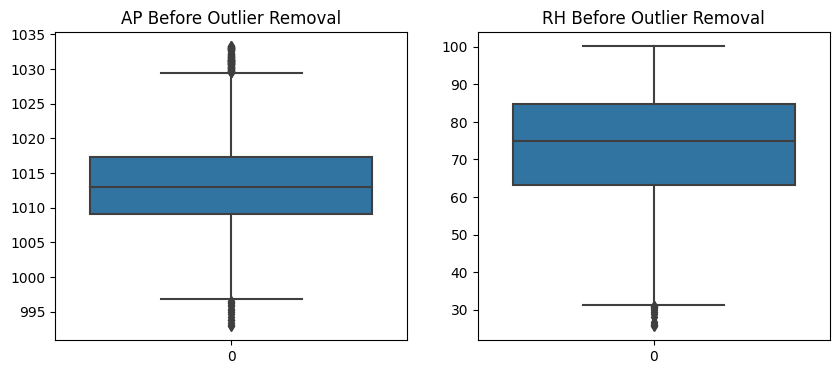

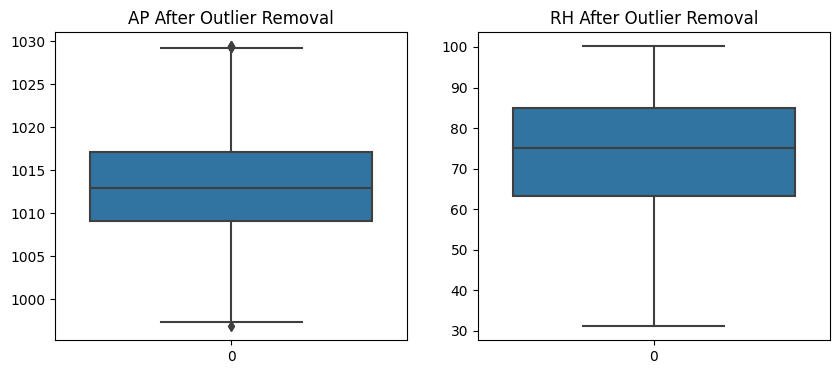

In [8]:
#before
pt.figure(figsize=(10, 4))
pt.subplot(1, 2, 1)
sb.boxplot(dataset['AP'])
pt.title('AP Before Outlier Removal')

pt.subplot(1, 2, 2)
sb.boxplot(dataset['RH'])
pt.title('RH Before Outlier Removal')
pt.show()

# After removing outliers
pt.figure(figsize=(10, 4))
pt.subplot(1, 2, 1)
sb.boxplot(clean_dataset['AP'])
pt.title('AP After Outlier Removal')

pt.subplot(1, 2, 2)
sb.boxplot(clean_dataset['RH'])
pt.title('RH After Outlier Removal')
pt.show()


As we can conclude that we sucessfully removed the outliers (not all, but 98% are removed) !

In [44]:
# print(clean_dataset[['AP', 'RH']].describe().T)

In [24]:
#Confirm that there are no values outside the defined thresholds
# print(clean_dataset[(clean_dataset['AP'] < lower_bound_ap) | (clean_dataset['AP'] > upper_bound_ap)])
# print(clean_dataset[(clean_dataset['RH'] < lower_bound_rh) | (clean_dataset['RH'] > upper_bound_rh)])

#### Renaming columns (Optional)

In [9]:
clean_dataset.rename(columns = {'AT':'Temperature', 'V':'Exhaust Vacuum', 'AP': 'Ambient Pressure',
                                      'RH':'Relative Humidity', 'PE':'Electrical energy output'}, inplace = True)
clean_dataset.head()

,Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Electrical energy output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### 3.3 Separating the features and the target into two different variables, X and y respectively.


In [10]:
#FEATURES
features = ['Temperature','Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
X = clean_dataset[features].values
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [11]:
#TARGET
y = clean_dataset['Electrical energy output'].values
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


It's crucial to evaluate a model's performance on unseen data to assess its generalization ability. This is where the train_test_split function from scikit-learn comes into play. 

**Training Set (X_train, y_train):**
- Used to train the machine learning model.
- The model learns patterns and relationships from this data.

**Test Set (X_test, y_test):**
 - Used to evaluate the model's performance on unseen data.
 - It helps assess how well the model generalizes to new, unseen examples.

In [12]:
# splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print(f"shape of X train: {X_train.shape} and shape of X test {X_test.shape}")

shape of X train: (7574, 4) and shape of X test (1894, 4)


In [14]:
print(f"shape of y train: {y_train.shape} and shape of y test {y_test.shape}")

shape of y train: (7574,) and shape of y test (1894,)


### 3.4 Feature Scaling: A Key Preprocessing Step (Optional in this situation)
 
***Common Feature Scaling Techniques:***

 - *Min-Max Scaling (Normalization):* Rescales features to a specific range, typically between 0 and 1.Formula: x_scaled = (x - min(x)) / (max(x) - min(x))

 - *Standardization (Z-score normalization):* Rescales features to have a mean of 0 and a standard deviation of 1. Formula: x_scaled = (x - mean(x)) / std(x)



In [53]:
#Feature scaling 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test= sc.transform(X_test)

In [195]:
# print("Scaled X_train")
# print(X_train)

In [196]:
# print("Scaled X_test")
# print(X_test)

> ## 5. Model Building 

### How XGBoost Works**

- **Initial Prediction**: Starts with a base prediction, such as the mean for regression.

- **Error Calculation**: Calculates the residuals or errors from the current model.

 - **Model Update**: Fits a new weak learner (decision tree) to the residuals to correct errors.

 - **Combination**: Combines the previous model and the new weak learner using a learning rate to form the final prediction.

### 5.1 Importing the deep learning Libraries, xgb.

In [ ]:
#if you don't have it then install it with this
!pip install xgb

In [15]:
import xgboost as xgb

### 5.2 Initializing the XGBoost Regressor

- *objective='reg:squarederror'* = This parameter specifies the loss function to be minimized.reg:squarederror indicates that we're using squared error as the loss function, which is suitable for regression problems.

- *n_estimators* = Number of boosting rounds
 - *max_depth* = Depth of each tree
 - *learning_rate=0.1* = Shrinkage step

In [16]:
xgbmodel = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100, max_depth=5, learning_rate=0.1, 
    random_state=42)

### 5.3 Train the model


In [17]:
xgbmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# Make predictions
y_pred = xgbmodel.predict(X_test)

#### Experiment with new data (Try/Optional)

In [ ]:
# Replace these with the actual new values you want to predict for.
new_data = [[<AT>, <V>, <AP>, <RH>]]  #25.0, 54.0, 1013.0, 75.0 (for example)

# If feature scaling was applied, transform the new data using the same scaler
# the following code if you used StandardScaler:
# new_data = scaler.transform(new_data)

# Make predictions
predicted_pe = model.predict(np.array(new_data))
# Display the prediction
print(f"Predicted Net Energy Output (PE): {predicted_pe[0]:.4f}")

### Model Evaluation Visualizations (Optional)
 - Residual Plot: This is useful to visually inspect the difference between predicted and actual values. You should expect residuals (errors) to be spread evenly around zero. If they are biased in some way, it could indicate that the model isn't capturing some important patterns.


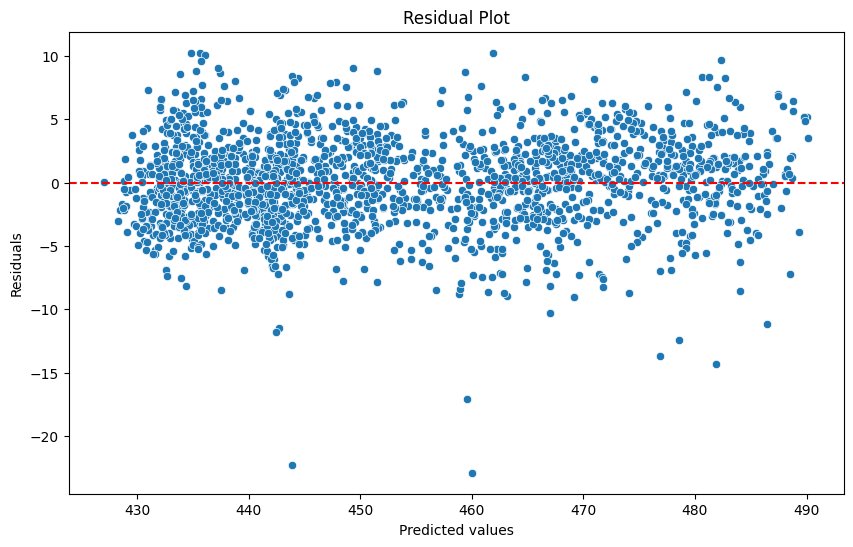

In [19]:
residuals = y_test - y_pred

pt.figure(figsize=(10,6))
sb.scatterplot(x=y_pred, y=residuals)
pt.axhline(y=0, color='r', linestyle='--')
pt.xlabel('Predicted values')
pt.ylabel('Residuals')
pt.title('Residual Plot')

folder_path8 = "E:\plots" 
file_name8 = "RESD_plot.png"
pt.savefig(f"{folder_path8}/{file_name8}", dpi=300, bbox_inches='tight') 
pt.show()

#### Insights from the Residual Plot:
 - Random Scattering Around Zero: The residuals appear randomly scattered around the zero line, indicating that the model captures the data pattern well and does not exhibit clear bias.

 - No Systematic Pattern: There is no discernible pattern (e.g., curved shape, clustering), which suggests that the model does not suffer from systematic errors like underfitting or overfitting.

 - Outliers:Some residuals deviate significantly from the zero line. These points could represent:
Outliers in the data.
Situations where the model struggled to predict accurately.
If these points are minimal and random, they might not significantly impact the overall model.

 - Homoscedasticity:The residuals have a fairly constant spread (variance) across the range of predicted values, which suggests that the model meets the assumption of homoscedasticity.


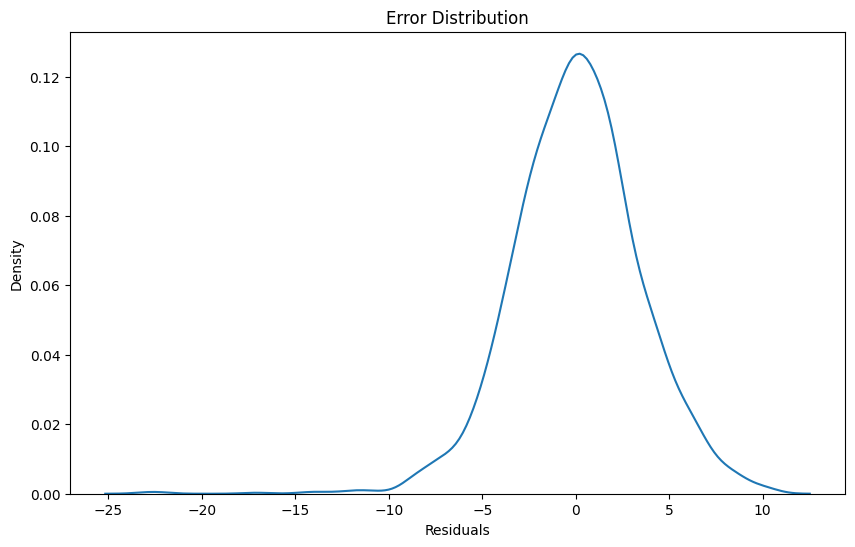

In [54]:
pt.figure(figsize=(10,6))
sb.kdeplot(residuals)
pt.xlabel('Residuals')
pt.title('Error Distribution')
pt.show()

 - Predicted vs Actual Plot: This plot is helpful to visually compare how well the model is performing by plotting the predicted values against the actual values. You should see a diagonal line (45-degree line) if the predictions are close to the actual values.

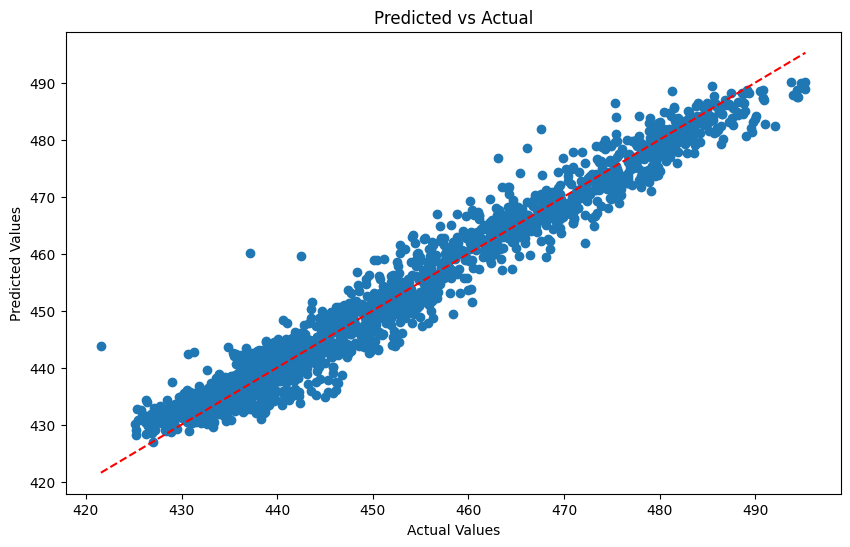

In [46]:
pt.figure(figsize=(10,6))
pt.scatter(y_test, y_pred)
pt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
pt.xlabel('Actual Values')
pt.ylabel('Predicted Values')
pt.title('Predicted vs Actual')
pt.show()

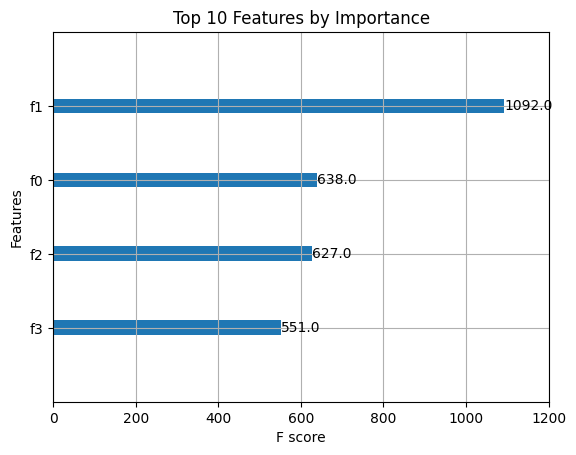

In [51]:
import xgboost as xgb
from xgboost import plot_importance

# Plotting feature importance
plot_importance(xgbmodel, importance_type='weight', max_num_features=10)
pt.title('Top 10 Features by Importance')
pt.show()

### 5.4 Evaluate the XGB model

In [183]:
# performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 2.6003


That's a great result! A Mean Absolute Error (MAE) of 2.6003 without feature scaling and hyperparameter tuning indicates that XGBoost is performing quite well on the CCPP dataset out of the box.

> ## 6.  Hyperparameter Tuning

 - **Using GridSearchCV to optimize the hyperparameters**

In [185]:
from sklearn.model_selection import GridSearchCV

p_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid = p_grid, scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_) #

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


### 6.1 Evaluate the best model

In [186]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"Best Model MAE: {mae_best}")

Best Model MAE: 2.0931940264434967


**Fantastic! The Mean Absolute Error (MAE) of 2.093 after hyperparameter tuning is a significant improvement over the previous results and indicates that the model is performing quite well.**

### 6.2 Re-training XGBoost model with the best parameters

In [187]:
best_xgbmodel = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)

best_xgbmodel.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [188]:
# Evaluate on the training set and test set

train_predictions = best_xgbmodel.predict(X_train)
test_predictions = best_xgbmodel.predict(X_test)

# MAE
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

Train MAE: 0.948811686122704
Test MAE: 2.0931940264434967


> ## 7. Model Evaluation

### 7.1 Cross-validation for your XGBoost model

In [190]:
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
# Initialize XGBoost model (using the best hyperparameters from tuning)
best_xgbmodel2 = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.8
)

# Define the scoring function as MAE
mae_scorer = make_scorer(mean_absolute_error)
# Set up KFold cross-validation (5-fold for example)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(best_xgbmodel2, X_train, y_train, cv=kf, scoring=mae_scorer)

In [191]:
# Print the cross-validation results
print(f"Cross-validation MAE scores: {cv_results}")
print(f"Mean MAE: {cv_results.mean():.4f}")
print(f"Standard Deviation: {cv_results.std():.4f}")

Cross-validation MAE scores: [2.17699114 2.25253453 2.23283953 2.24044217 2.28654489]
Mean MAE: 2.2379
Standard Deviation: 0.0356


The mean MAE of 2.2379 is very close to your earlier test set MAE of 2.093, which indicates that the model is generalizing well. The small standard deviation (0.0356) further reinforces this, suggesting that the model's performance is stable across different data splits. This means the model isn't overfitting and has good consistency.

- ***Train MAE***: 0.9488 (This indicates the model fits the training data well, but we should focus more on how it performs on unseen data, i.e., the test set.)
- ***Test MAE***: 2.0932 (This is the MAE on the test data, which is more important as it reflects the model’s generalization ability on new, unseen data.)
- ***Cross-validation MAE (Mean)***: 2.2379 (This is the mean MAE from the cross-validation, which gives you a more robust estimate of the model's performance by averaging it over different folds.)
- ***Cross-validation Standard Deviation***: 0.0356 (This indicates the variance in the model’s performance across different folds. A low standard deviation suggests that the model performs consistently across different subsets of the data.)


## Final Model Evaluation**
#### ✦ **Train MAE: 0.9488**
#### ✦ **Test MAE: 2.0932**
#### ✦ **Cross-validation Mean MAE: 2.2379**
#### ✦ **Cross-validation Standard Deviation: 0.0356**

*Robust Performance: XGBoost outperformed baseline models with a significantly lower MAE (2.093).
Scalability: Its ability to handle large datasets with complex interactions makes it an industry-preferred algorithm.
Insights: Provided valuable information on which factors most impact power output, offering both predictive and prescriptive value.*

> ### How I Tackled the Problem Using XGBoost
1. **Data Exploration and Understanding**
Analyzed the distribution of each feature (AT, V, AP, RH) and their correlation with the target variable (PE).
Identified potential relationships such as negative correlation between Ambient Temperature (AT) and Power Output (PE).

2. **Data Preprocessing**
Checked for missing values and outliers.
Split the dataset into training (80%) and test sets (20%).

3. **Model Selection**
Chose XGBoost Regressor for its ability to handle:
Non-linear relationships between input features and target variables.
Feature importance analysis, which provides insights into which variables are most predictive.

4. **Baseline Model**
Trained the initial XGBoost model without feature scaling or hyperparameter tuning, achieving a baseline Mean Absolute Error (MAE) of 2.6003 on the test set.

5. **Hyperparameter Tuning**
Used GridSearchCV to optimize the following hyperparameters:
learning_rate
max_depth
n_estimators
subsample
colsample_bytree
min_child_weight
Achieved a tuned model with parameters:
*MAE (Test): 2.093
Cross-Validation Mean MAE: 2.237*

6. **Model Validation**
Performed k-fold cross-validation to ensure the model's performance generalized well across multiple subsets of the data.

7. **Model Interpretation**
Feature Importance: Found that Ambient Temperature (AT) had the most significant impact on power output.
Explained the relationship between input features and power output. 

_________________________________________________ **THANK YOU** ________________________________________________________________